# Logistic Regression with Gradient Descent
In this notebook, we implement logistic regression from scratch using gradient descent.

We will:
- Derive and use the logistic loss and gradient
- Generate synthetic classification data
- Train using gradient descent
- Plot the sigmoid function and convergence

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

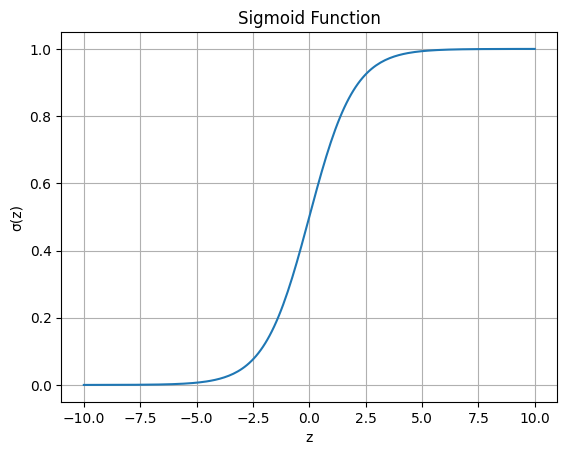

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

# Interpretation
The sigmoid squashes any real-valued input into the range (0, 1).
- It’s steepest around z = 0.
- It is used as the predicted probability in logistic regression.

In [5]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2,
                           n_redundant=0, random_state=42)

# Add bias term (intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))  # shape: (200, 3)

In [6]:
def compute_loss(X, y, theta):
    z = X @ theta
    h = sigmoid(z)
    eps = 1e-15  # to prevent log(0)
    loss = -np.mean(y * np.log(h + eps) + (1 - y) * np.log(1 - h + eps))
    return loss

def compute_gradient(X, y, theta):
    z = X @ theta
    h = sigmoid(z)
    grad = X.T @ (h - y) / len(y)
    return grad

In [7]:
def gradient_descent(X, y, alpha=0.1, epochs=1000):
    theta = np.zeros(X.shape[1])
    losses = []

    for i in range(epochs):
        grad = compute_gradient(X, y, theta)
        theta -= alpha * grad
        loss = compute_loss(X, y, theta)
        losses.append(loss)
    return theta, losses

In [8]:
theta, losses = gradient_descent(X, y, alpha=0.1, epochs=200)

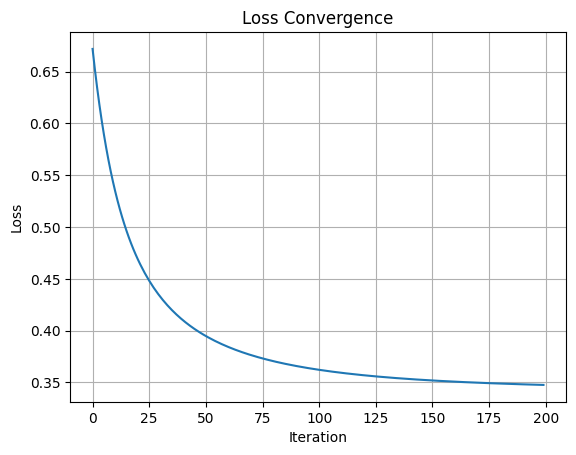

In [9]:
plt.plot(losses)
plt.title("Loss Convergence")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Summary
- We derived the gradient:
  ∇L(θ) = (1/n) Xᵀ (σ(Xθ) - y)
- Implemented logistic regression with gradient descent
- Observed convergence of loss and the sigmoid curve

Real-World Dataset: Breast Cancer (Optional Extension)

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X_real = data.data
y_real = data.target

# Standardize features
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real)

# Add bias (intercept) term
X_real_scaled = np.hstack([np.ones((X_real_scaled.shape[0], 1)), X_real_scaled])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_real_scaled, y_real, test_size=0.2, random_state=42)

In [11]:
theta_real, losses_real = gradient_descent(X_train, y_train, alpha=0.1, epochs=300)

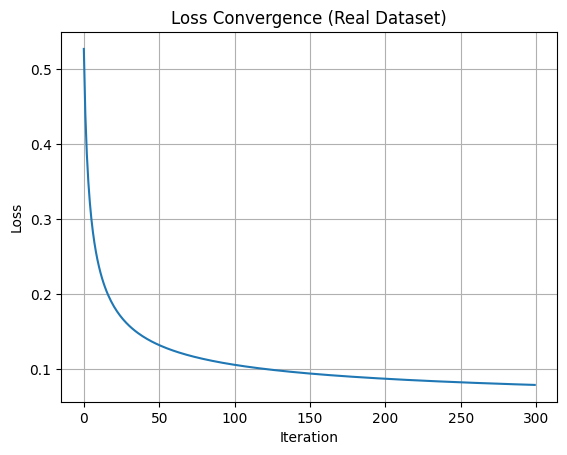

In [12]:
plt.plot(losses_real)
plt.title("Loss Convergence (Real Dataset)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [13]:
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

y_pred = predict(X_test, theta_real)
accuracy = np.mean(y_pred == y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 98.25%


# Real-World Results
- We used the Breast Cancer dataset from sklearn.
- Gradient descent successfully minimized the loss.
- We achieved high test accuracy, demonstrating logistic regression's performance on real data.